In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
import tensorflow as tf

In [3]:
IMG_ROOT = './resources/DATA/cell_images/'

In [4]:
os.listdir(IMG_ROOT)

['.DS_Store', 'test', 'train']

In [5]:
from matplotlib.image import imread

In [6]:
test_path = IMG_ROOT + 'test/'
training_path = IMG_ROOT + 'train/'

In [7]:
test_path

'./resources/DATA/cell_images/test/'

In [8]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [9]:
os.listdir(training_path + 'parasitized')[0]

'C189P150ThinF_IMG_20151203_142224_cell_84.png'

In [10]:
para_cell = training_path + 'parasitized/' + 'C189P150ThinF_IMG_20151203_142224_cell_84.png'

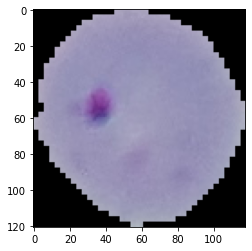

In [11]:
plt.imshow(imread(para_cell))

In [12]:
os.listdir(training_path + 'uninfected')[0]

'C13NThinF_IMG_20150614_131318_cell_179.png'

In [13]:
uninfected_cell = training_path + 'uninfected/' + 'C13NThinF_IMG_20150614_131318_cell_179.png'

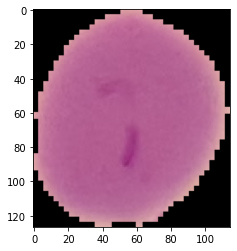

In [14]:
plt.imshow(imread(uninfected_cell))

In [15]:
len(os.listdir(training_path + 'uninfected')), len(os.listdir(training_path + 'parasitized'))

(12480, 12480)

In [16]:
len(os.listdir(test_path + 'uninfected')), len(os.listdir(test_path + 'parasitized'))

(1300, 1300)

In [17]:
dim1 = []
dim2 = []

for file in os.listdir(test_path+'uninfected'):
    img = imread(test_path+'uninfected/' + file)
    d1, d2, colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

/Users/loic.combis/Desktop/workspace/tf-bootcamp/env/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


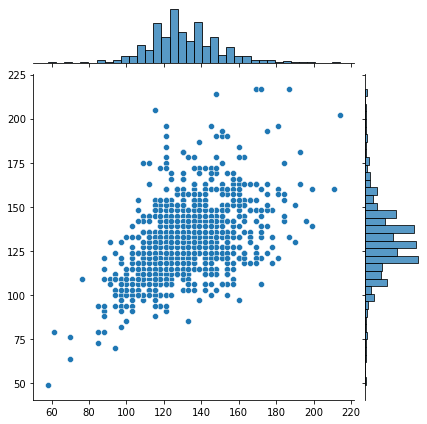

In [18]:
sns.jointplot(dim1, dim2)

In [19]:
np.mean(dim1), np.mean(dim2)

(130.92538461538462, 130.75)

In [20]:
image_shape = (130, 130, 3)

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
# help(ImageDataGenerator)

In [23]:
gen = ImageDataGenerator(
    rotation_range=20, 
    width_shift_range=0.1, 
    height_shift_range=0.1,
    rescale=1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

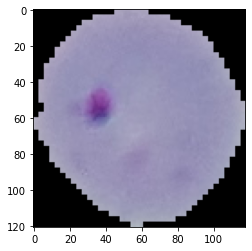

In [24]:
para_image = imread(para_cell)
plt.imshow(para_image)

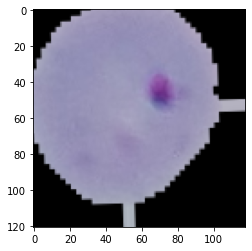

In [25]:
plt.imshow(gen.random_transform(para_image))

In [26]:
gen.flow_from_directory(training_path)

Found 24958 images belonging to 2 classes.


In [27]:
gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [28]:
from tensorflow.keras.models import Sequential

In [29]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

In [30]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", patience=2)

In [33]:
batch_size=16

In [34]:
train_img_gen = gen.flow_from_directory(
    training_path, 
    target_size=image_shape[:2],
    color_mode='rgb', 
    batch_size=batch_size,
    class_mode="binary"
)

test_img_gen = gen.flow_from_directory(
    test_path, 
    target_size=image_shape[:2],
    color_mode='rgb', 
    batch_size=batch_size,
    class_mode="binary",
    shuffle=False
)

Found 24958 images belonging to 2 classes.
Found 2600 images belonging to 2 classes.


In [35]:
train_img_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [36]:
# results = model.fit_generator(train_img_gen, epochs=20, validation_data=test_img_gen, callbacks=[early_stop])

In [37]:
from tensorflow.keras.models import load_model

In [38]:
model = load_model('./resources/04-CNNs/malaria_detector.h5')

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [1]:
model.evaluate_generator(test_img_gen)

NameError: name 'model' is not defined